#  Task - Extract table content from pdf

Text extraction from PDF using Python can be achieved through several libraries such as **PyPDF2**, **pdfminer**,**pdftotext**,**tabula** etc but these libraries is not detecting any text in a PDF file (For example refer next cell).One possible reason is that the PDF file contains **images** or **scanned pages**.

In [1]:
import PyPDF2

# Open the PDF file in read-binary mode
pdf_file = open('Pdf_1.pdf', 'rb')

# Create a PdfFileReader object
pdf_reader = PyPDF2.PdfFileReader(pdf_file)

# Get the number of pages in the PDF file
num_pages = pdf_reader.getNumPages()

# Loop through each page and extract the text
for page in range(num_pages):
    # Get the current page object
    pdf_page = pdf_reader.getPage(page)
    
    # Extract the text from the page
    page_text = pdf_page.extractText()
    
    # Print the extracted text
    print(page_text)

In [2]:
page_text

''

In [3]:
import tabula

# extract table data from PDF file
df = tabula.read_pdf("Pdf_1.pdf", pages='all')
df

[]

## OCR (Optical Character Recognition)

It is used in text extraction from PDF files when the file contains scanned images of text instead of actual text and **OCR** can recognize the text in these scanned images and convert them into machine-readable text.

So I convert to pdf to image file in order to using **OCR** 

## Pytesseract

**Pytesseract is a Python wrapper for Tesseract OCR and It allows developers to use Tesseract's OCR capabilities in Python programs to recognize text in images** 

**I referred [analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/12/optical-character-recognition-using-pytesseract/) blog for text extraction from scanned pdf file**

### Package installation

In [4]:
!pip install pytesseract
!pip install pillow

### Import necessary libaries

In [5]:
import pytesseract        # Import the pytesseract module for OCR
from PIL import Image     # Import the Image module from the PIL library for working with images
import re                 # Import the regular expressions (re) module for working with text patterns
import pandas as pd       # Import the pandas library for working with dataframes
import cv2                # Import the OpenCV library for image processing
import matplotlib.pyplot as plt  # Import the matplotlib library for visualizing images

## Method to identify the table contents

**First I import the pytesseract and PIL packages and then open an image file using the PIL package's Image.open() method. Next, I use pytesseract's image_to_string() method to extract the text from the image. Finally ,print the extracted text.**

In [6]:
def imagetostr(img,config):
    img = Image.open(img) # Load the image
    config = f"--psm {config} --oem 3" # parameter used to set various configuration options for pytesseract
    text = pytesseract.image_to_string(img,config=config) # Extract the text
    return text

## Extract text from first pdf

Load the first pdf using pytesseract OCR for extraction

#### Visualize the image

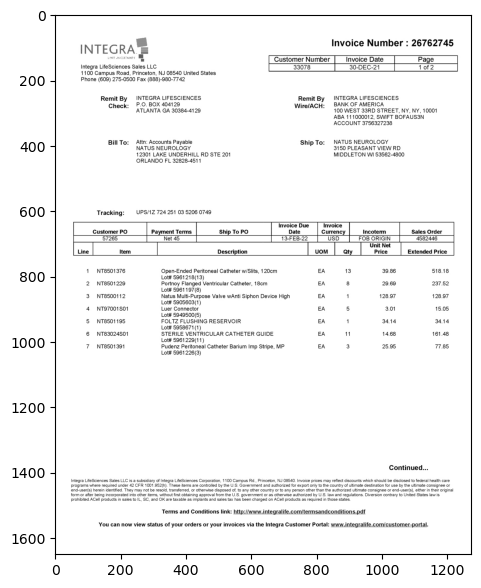

In [7]:
plt.figure(figsize=[10,7]) #adjust the size
img1 = cv2.imread('pdf_image/Pdf_1_page-0001.jpg') #read the image using opencv
plt.imshow(img1);

In [8]:
text1 = imagetostr('pdf_image/Pdf_1_page-0001.jpg',3) #extract text using pytesseract
print(text1)

INTEGRA

Invoice Number : 26762745

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

on ascsacainry Customer Number Invoice Date Page
Integra LifeSciences Sales LLC 33078 30-DEC-21 Tof2
1100 Campus Road, Princeton, NJ 08540 United States
Phone (609) 275-0500 Fax (888)-980-7742
Remit By _ INTEGRA LIFESCIENCES Remit By _ INTEGRA LIFESCIENCES
Check: P.O. BOX 404129 Wire/ACH: BANK OF AMERICA
ATLANTA GA 30384-4129 100 WEST 33RD STREET, NY, NY, 10001
ABA 111000012, SWIFT BOFAUS3N
ACCOUNT 3756327238
Bill To: Attn: Accounts Payable Ship To: | NATUS NEUROLOGY
NATUS NEUROLOGY 3150 PLEASANT VIEW RD.
12301 LAKE UNDERHILL RD STE 201 MIDDLETON WI 53562-4800
ORLANDO FL 32828-4511
Tracking: UPS/Z 724 251 03 5206 0749
Invoice Due Invoice
Customer PO Payment Terms Ship To PO Date Currency Incoterm Sales Order
57265 Net 45 13-FEB-22 USD FOB ORIGIN 4582446
Unit Net
Line Item Description UOM Qty Price Extended Price
1 NT8501376 Open-Ended Peritoneal Catheter w/Slits, 120cm EA 13 39.86 5

## Regex function

regex functions use to match or search text based on patterns

**I referred [regex editor](https://regex101.com/r/ry8aTb/1) website for testing and experimenting with regular expressions**

**Some of the symbols used in re for match patterns**

1   .   - Matches any single character except newline.

2   *   - Matches zero or more occurrences of the preceding character

3   [ ] - Matches any one character within the brackets

4   ( ) - Groups a set of expressions

5   |   - Matches one of two or more alternatives

6   \   - Escapes special characters

7   \n  - matches any newline character

8   w   - matches any single alphanumeric character

## Method to find patterns

In [9]:
def findpattern(pattern,text):
    matches = re.findall(pattern,text) #to search text based on patterns
    if matches:
        return matches[0]

### extract heading/columns

In [10]:
heading = findpattern('Line.*',text1) #find heading in text1 based on pattern 
heading = heading.split(' ')  #split the heading
heading

['Line', 'Item', 'Description', 'UOM', 'Qty', 'Price', 'Extended', 'Price']

### preprocessing the text

In [11]:
text1 = text1.replace('  ',' ') #replace extra white space
text1 = text1.replace('=','') #replace the symbol
contentsplit = text1.split('\n') #split the text every new line for looping

### extract line values

In [12]:
line = []
for content in contentsplit:
    match = findpattern('(\d) NT',content) #find line values based on pattern 
    if match != None :
        line.append(match)
line

['1', '2', '3', '4', '5', '6', '7']

### extract items values

In [13]:
items = []
for content in contentsplit:
    match = findpattern('NT\d\w*',content)#find items values based on pattern
    if match != None :
        items.append(match)
items

['NT8501376',
 'NT8501229',
 'NT8500112',
 'NT97001S01',
 'NT8501195',
 'NT83024S01',
 'NT8501391']

### extract description values

In [14]:
description = []
for content in contentsplit:
    match = findpattern('NT\d\w* (.*) EA',content)#find desc values based on pattern
    if match != None :
        description.append(match)
description

['Open-Ended Peritoneal Catheter w/Slits, 120cm',
 'Portnoy Flanged Ventricular Catheter, 18cm',
 'Natus Multi-Purpose Valve wAnti Siphon Device High',
 'Luer Connector',
 'FOLTZ FLUSHING RESERVOIR',
 'STERILE VENTRICULAR CATHETER GUIDE',
 'Pudenz Peritoneal Catheter Barium Imp Stripe, MP.']

In [15]:
description2 = []
for content in contentsplit:
    match = findpattern('Lot.*',content)
    if match != None :
        description2.append(match)
description2

['Lot# 5961218(13)',
 'Lot# 5961197(8)',
 'Lot# 5905603(1)',
 'Lot# 5949500(5)',
 'Lot# 5958671 (1)',
 'Lot# 5961229(11)',
 'Lot# 5961226(3)']

In [16]:
#combine both description together
description_comb = []
for i in range(len(description)):
    comb = description[i] + ' ' + description2[i]
    description_comb.append(comb)
description_comb

['Open-Ended Peritoneal Catheter w/Slits, 120cm Lot# 5961218(13)',
 'Portnoy Flanged Ventricular Catheter, 18cm Lot# 5961197(8)',
 'Natus Multi-Purpose Valve wAnti Siphon Device High Lot# 5905603(1)',
 'Luer Connector Lot# 5949500(5)',
 'FOLTZ FLUSHING RESERVOIR Lot# 5958671 (1)',
 'STERILE VENTRICULAR CATHETER GUIDE Lot# 5961229(11)',
 'Pudenz Peritoneal Catheter Barium Imp Stripe, MP. Lot# 5961226(3)']

### extract uom values

In [17]:
uom = []
for content in contentsplit:
    match = findpattern('EA ',content)#find uom values based on pattern
    if match != None :
        uom.append(match)
uom

['EA ', 'EA ', 'EA ', 'EA ', 'EA ', 'EA ', 'EA ']

### extract qty values

In [18]:
qty = []
for content in contentsplit:
    match = findpattern('EA (\d*)',content)#find qty values based on pattern
    if match != None :
        qty.append(match)
qty

['13', '8', '1', '5', '4', '11', '2']

### extract price values

In [19]:
price= []
for content in contentsplit:
    match = findpattern('EA \d* (\d*\.\d*)',content)#find price values based on pattern
    if match != None :
        price.append(match)
price

['39.86', '29.69', '128.97', '3.01', '34.14', '14.68', '25.95']

### extract ext.price values

In [20]:
extended_price= []
for content in contentsplit:
    match = findpattern('EA \d* \d*\.\d* (\d*\.\d*)',content)#find ext.price values based on pattern
    if match != None :
        extended_price.append(match)
extended_price

['518.18', '237.52', '128.97', '15.05', '34.14', '161.48', '77.85']

In [21]:
#combine all list values into another list
all_values = [line,items,description_comb,uom,qty,price,extended_price]

## DataFrame of first pdf

In [22]:
#data = {}
df1 = pd.DataFrame()
for i in range(len(heading)-1): #loop through heading and values to create df
    df1[heading[i]] = all_values[i]

## =======================================================================

In [23]:
df1

,Line,Item,Description,UOM,Qty,Price,Extended
0,1,NT8501376,"Open-Ended Peritoneal Catheter w/Slits, 120cm ...",EA,13,39.86,518.18
1,2,NT8501229,"Portnoy Flanged Ventricular Catheter, 18cm Lot...",EA,8,29.69,237.52
2,3,NT8500112,Natus Multi-Purpose Valve wAnti Siphon Device ...,EA,1,128.97,128.97
3,4,NT97001S01,Luer Connector Lot# 5949500(5),EA,5,3.01,15.05
4,5,NT8501195,FOLTZ FLUSHING RESERVOIR Lot# 5958671 (1),EA,4,34.14,34.14
5,6,NT83024S01,STERILE VENTRICULAR CATHETER GUIDE Lot# 596122...,EA,11,14.68,161.48
6,7,NT8501391,"Pudenz Peritoneal Catheter Barium Imp Stripe, ...",EA,2,25.95,77.85


## ====================== End of first pdf file =================================

## Extract text from second pdf

#### Visualize the image

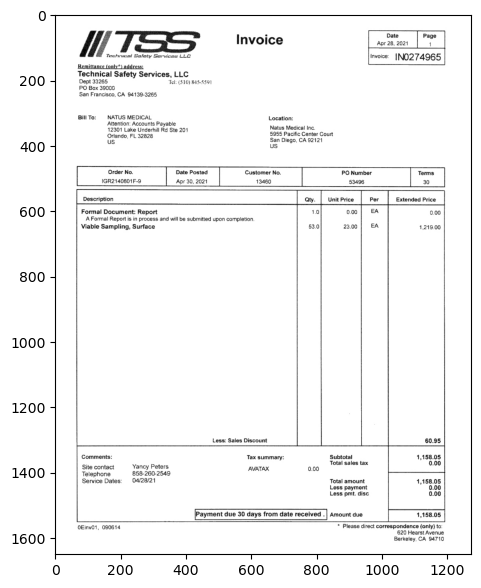

In [24]:
plt.figure(figsize=[10,7])
img1 = cv2.imread('pdf_image/Pdf_2_page-0001.jpg')
plt.imshow(img1);

In [25]:
text2 = imagetostr('pdf_image/Pdf_2_page-0001.jpg',3) #extract text using pytesseract
print(text2)

Date

Invoice Apr 28, 2021
Techmanl Safety Services LLC Invoice: |NO274965

 

 

Remit iy" é

Technical Safety Services, LLC

Dept 33265 Tel: ($10) 845-559]
PO Box 39000

San Francisco, CA 94139-3265

   

 

 

 

 

 

 

 

 

Bill To: NATUS MEDICAL Location:
Attention: Accounts Payable N Medical |
12301 Lake Underhill Rd Ste 201 eis Medica! Ine.
Orlando, FL 32828 5955 Pacific Center Court
US - San Diego, CA 92121
us
Order Ni Date Posted Customer Ni PO Number Terms
IGR2140801F-9 Apr 30, 2021 13460 53496. 30
Description Qty. | Unit Price Per Extended Price
Formal Document: Report 1.0 0.00 EA 0.00
A Formal Report is in process and will be submitted upon completion.
Viable Sampling, Surface 53.0 23.00 EA 1,219.00
Less: Sales Discount 60.95
Comments: Tax summary: Subtotal 41,158.05
. Total sales tax 0.00
Site contact Yancy Peters AVATAX 0.00
Telephone 858-260-2549
Service Dates: 04/28/21 Total amount 41,158.05
Less payment 0.00
Less pmt. disc 0.00
Payment due 30 days from date received

### Preprocessing

In [26]:
#remove unwanted symbols and whitespace
text2 = text2.replace('|','')
text2 = text2.replace('.','')
text2 = text2.replace('  ',' ')

### extract heading/columns

In [27]:
heading = findpattern('Des.*',text2) #find heading values based on pattern
heading = heading.split(' ')
heading

['Description', 'Qty', 'Unit', 'Price', 'Per', 'Extended', 'Price']

In [28]:
#combine Unit and Extended for both Price
heading[2] = ' '.join(heading[2:4])
heading[5] = ' '.join(heading[5:7])
#remove both extra Price 
heading.remove('Price')
heading.remove('Price')
heading

['Description', 'Qty', 'Unit Price', 'Per', 'Extended Price']

In [29]:
#split for looping through text
contentsplit = text2.split('\n')

### extract desc values

In [30]:
description = []
for content in contentsplit:
    match = findpattern('(.*) \d{2} \d{3} EA |(.*) \d{3} \d{4} EA',content)#find desc values based on pattern
    if match != None:
        description.append(match)
description

[('Formal Document: Report', ''), ('', 'Viable Sampling, Surface')]

In [31]:
#remove '' symbol
description = [s for tup in description for s in tup if s]
description

['Formal Document: Report', 'Viable Sampling, Surface']

### extract qty values

In [32]:
qty = []
for content in contentsplit:
    match = findpattern('(\d{2}) \d{3} EA|(\d{3}) \d{4} EA',content)#find qty values based on pattern
    if match != None:
        qty.append(match)
qty = [s for q in qty for s in q if s] #remove '' symbol
qty

['10', '530']

### extract unit price values

In [33]:
unit_price = []
for content in contentsplit:
    match = findpattern('(\d{3}) EA|(\d{4}) EA',content) #find unit price values based on pattern
    if match != None:
        unit_price.append(match)
unit_price = [s for q in unit_price for s in q if s] #remove '' symbol
unit_price

['000', '2300']

### extract per values

In [34]:
per = []
for content in contentsplit:
    match = findpattern('EA',content) #find per values based on pattern
    if match != None:
        per.append(match)
per

['EA', 'EA']

### extract extended price values

In [35]:
extended_price= []
for content in contentsplit:
    match = findpattern('EA (.*)',content) #find ext.price values based on pattern
    if match != None:
        extended_price.append(match)
extended_price

['000', '1,21900']

In [36]:
#combine all list values into another list
full2 = [description,qty,unit_price,per,extended_price]

In [37]:
data = {}
for i in range(len(heading)):
    data[heading[i]] = full2[i]

In [38]:
data

{'Description': ['Formal Document: Report', 'Viable Sampling, Surface'],
 'Qty': ['10', '530'],
 'Unit Price': ['000', '2300'],
 'Per': ['EA', 'EA'],
 'Extended Price': ['000', '1,21900']}

## DataFrame of second pdf

## ======================================================================

In [39]:
df2 = pd.DataFrame(data)
df2

,Description,Qty,Unit Price,Per,Extended Price
0,Formal Document: Report,10,000,EA,000
1,"Viable Sampling, Surface",530,2300,EA,"1,21900"


## ======================================================================

## Extract second page of second pdf

### Image preprocessing

**Preprocessing an image before using Optical Character Recognition (OCR) can improve the accuracy and efficiency of text extraction**

#### Visualize the image

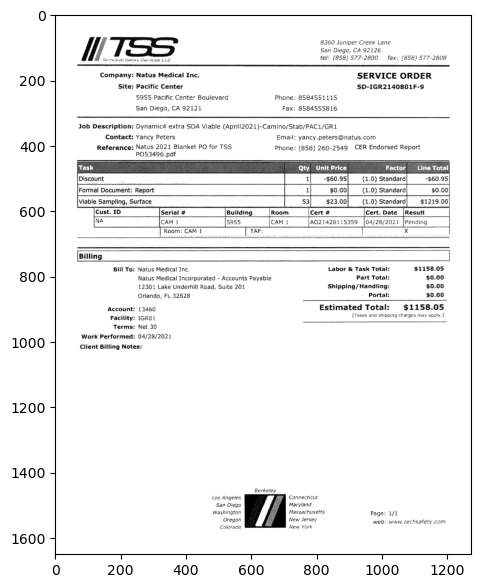

In [40]:
plt.figure(figsize=[10,7])
img1 = cv2.imread('pdf_image/Pdf_2_page-0002.jpg')
plt.imshow(img1);

### Apply thresholding to binarize the image

In [41]:
# Read the image
image = cv2.imread('pdf_image/Pdf_2_page-0002.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Save the binarized image
cv2.imwrite('pdf_image/second_2_pre.jpg',thresholded_image)

True

In [42]:
text2_2 = imagetostr('pdf_image/second_2_pre.jpg',3) #extract text using pytesseract
print(text2_2)

8360 Juniper Creek Lane
San Diego, CA 92126

 

Tantininal Safely Seroces LLG tel: (858) 577-2800 fax: (858) $77-2808
Company: Natus Medical Inc. SERVICE ORDER
Site: Pacific Center SD-IGR2140801F-9
5955 Pacific Center Boulevard Phone: 8584551115
San Diego, CA 92121 Fax: 8584555816

 

Job Description: Dynamic4 extra SDA Viable {Aprill2021)-Camino/Stab/PAC1/GR1
Contact: Yancy Peters Email: yancy peters@natus.com

Reference: Natus 2021 Blanket PO for TSS Phone: (858) 260-2549 CER Endorsed Report
PO53496.pdf

  
 

     
  

ira gic] eC

    
    
   

  

 

 

 
  
  

 

   
 

 

 

 

 

 

 

Discount (1.0) Standard -$60.95
Formal Decument: Report {1.0) Standard $0,00
Viable. Sampling,. Surface (1.0) Standard $1219.00
Serial # Buliding Room cert # Cert. Date jResult
[NA [cam 1 [5955 [cam 1 [a021428115359 [04/28/2021 [Pending
[Reom: CAM 1 | TAF: ] x
(Billing
Bul To: Natus Medical Inc. Labor & Task Total: $1158.05
Natus Medical Incorporated - Accounts Payabie Part Total: $0.00
12301 L

In [43]:
contentsplit = text2_2.split('\n')

### extract task values

In [44]:
task = []
for content in contentsplit:
    match = findpattern('(.*) \(1.0|(.*){1',content) #find task values based on pattern
    if match != None:
        task.append(match)
task = [s for q in task for s in q if s] #remove '' symbol
task

['Discount', 'Formal Decument: Report ', 'Viable. Sampling,. Surface']

### extract factor values

In [45]:
factor = []
for content in contentsplit:
    match = findpattern('\(1.0\) S.*d|\{1.0\) S.*d',content) #find factor values based on pattern
    if match != None:
        factor.append(match)
factor

['(1.0) Standard', '{1.0) Standard', '(1.0) Standard']

### extract line total values

In [46]:
line_total = []
for content in contentsplit:
    match = findpattern('d (\$.*)|-(\$.*)',content) #find line total values based on pattern
    if match != None:
        line_total.append(match)
line_total = [s for q in line_total for s in q if s] #remove '' symbol
line_total

['$60.95', '$0,00', '$1219.00']

In [47]:
data_2 = {'Task':task,
         'Factor':factor,
         'Line Total':line_total}

## DataFrame of next page of second pdf

## =====================================================================

In [48]:
df2_2 = pd.DataFrame(data_2)
df2_2

,Task,Factor,Line Total
0,Discount,(1.0) Standard,$60.95
1,Formal Decument: Report,{1.0) Standard,"$0,00"
2,"Viable. Sampling,. Surface",(1.0) Standard,$1219.00


## ======================== End of Second pdf ==============================

## Extract text from third pdf

#### Visualize the image

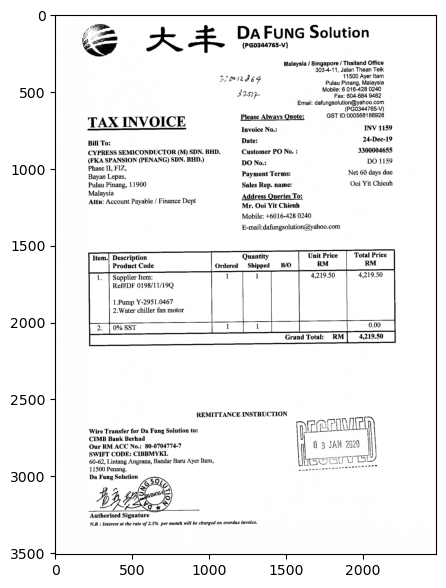

In [49]:
plt.figure(figsize=[10,7])
img1 = cv2.imread('pdf_image/Pdf_3_page-0001.jpg')
plt.imshow(img1);

In [50]:
text3 = imagetostr('pdf_image/Pdf_3_page-0001.jpg',3) #extract text using pytesseract
print(text3)

 

Ce

— DA FUNG Solution
x K 2 (PG0344765-V)

Malaysia / Singapore / Thailand Office
303-4-11, Jalan Thean Teik
S72 O°123E g 11 500 Ayer Itam
Pulau Pinang, Malaysia

Mobile: 6 016-428 0240

F251 Fax: 604-684 9482
Email: dafungsolution@yahoo.com
(PG0344765-V)
T AX INV OI CE Please Always Quote: GST 1D:000568188928
Bill To: Date: 24-Dec-19
CYPRESS SEMICONDUCTOR (M) SDN. BHD. Customer PO No. : 3300004655
(FKA SPANSION (PENANG) SDN. BHD.) .
Phase II, FIZ, DO No.: DO 1159
Bayan Lepas, Payment Terms: Net 60 days due
Pulau Pinang, 11900 Sales Rep. name: Ooi Yit Chieuh
Malaysia Add ies To:
Attn: Account Payable / Finance Dept Address Queries To:
Mr. Ooi Yit Chieuh

Mobile: +6016-428 0240
E-mail:dafungsolution@yahoo.com

Description Quantity Unit Price Total Price
Product Code Ordered Shipped B/O RM RM

Supplier Item: 1 1 4,219.50 4,219.50
Ref#DF 0198/11/19Q

   
    
 
 
 

    

  

  
  
     
 

1.Pump Y-2951.0467
2. Water chiller fan motor

apes eo

 
 

  
   

REMITTANCE INSTRUCTION
rni

### Extract heading or columns

In [51]:
heading = findpattern('Des.*',text3)
heading = heading.split(' ')
heading

['Description', 'Quantity', 'Unit', 'Price', 'Total', 'Price']

In [52]:
heading[2] = ' '.join(heading[2:4])
heading[5] = ' '.join(heading[4:6])
heading.remove('Price')
heading.remove('Total')
heading

['Description', 'Quantity', 'Unit Price', 'Total Price']

In [53]:
contentsplit = text3.split('\n')

### extract desc values

In [54]:
description = []
for content in contentsplit:
    match = findpattern('Supplier Item',content) #find desc values based on pattern
    if match != None:
        description.append(match)
description

['Supplier Item']

### extract qty values

In [55]:
qty = []
for content in contentsplit:
    match = findpattern('Item: (1)',content) #find qty values based on pattern
    if match != None:
        qty.append(match)
qty

['1']

### extract unit price values

In [56]:
unit_price = []
for content in contentsplit:
    match = findpattern('1 (4,219.50)',content) #find unit price values based on pattern
    if match != None:
        unit_price.append(match)
unit_price

['4,219.50']

### extract total_price values

In [57]:
total_price = []
for content in contentsplit:
    match = findpattern('0 (4,219.50)',content) #find total price values based on pattern
    if match != None:
        total_price.append(match)
total_price

['4,219.50']

In [58]:
#combine all list values into another list
full3 = [description,qty,unit_price,total_price]

In [59]:
data3 = {}
for i in range(len(heading)):
    data3[heading[i]] = full3[i]
data3

{'Description': ['Supplier Item'],
 'Quantity': ['1'],
 'Unit Price': ['4,219.50'],
 'Total Price': ['4,219.50']}

## DataFrame of third pdf

## ======================================================================

In [60]:
df3 = pd.DataFrame(data3)
df3

,Description,Quantity,Unit Price,Total Price
0,Supplier Item,1,"4,219.50","4,219.50"


## ======================= End of thrid pdf ==================================